<a href="https://colab.research.google.com/github/pravallikai/Evolution-of-musical-trends-using-py/blob/main/notebooks/5_trend_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os, sys, pathlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Connect to your GitHub repo (same setup as before)
GITHUB_USER = "pravallikai"
REPO_NAME = "Evolution-of-musical-trends-using-py"

if not pathlib.Path(REPO_NAME).exists():
    !git clone https://github.com/{GITHUB_USER}/{REPO_NAME}.git

os.chdir(REPO_NAME)
print("✅ Repo connected. Current files:", os.listdir("data/processed"))


Cloning into 'Evolution-of-musical-trends-using-py'...
remote: Enumerating objects: 119, done.
remote: Counting objects: 100% (119/119), done.
remote: Compressing objects: 100% (109/109), done.
remote: Total 119 (delta 43), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (119/119), 5.16 MiB | 5.46 MiB/s, done.
Resolving deltas: 100% (43/43), done.
✅ Repo connected. Current files: ['spotify_audio_features_1960_2019_clean.csv', '.gitkeep']


In [ ]:
df = pd.read_csv("data/processed/spotify_audio_features_1960_2019_clean.csv")
print("✅ Loaded cleaned dataset with shape:", df.shape)
df.head()



✅ Loaded cleaned dataset with shape: (41106, 11)


,year,track,artist,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo
0,1960,Jealous Kind Of Fella,Garland Green,0.417,0.620,-7.727,0.0403,0.490,0.000000,0.845,185.655
1,1960,Initials B.B.,Serge Gainsbourg,0.498,0.505,-12.475,0.0337,0.018,0.107000,0.797,101.801
2,1960,Melody Twist,Lord Melody,0.657,0.649,-13.392,0.0380,0.846,0.000004,0.908,115.940
3,1960,Mi Bomba Sonó,Celia Cruz,0.590,0.545,-12.058,0.1040,0.706,0.024600,0.967,105.592
4,1960,Uravu Solla,P. Susheela,0.515,0.765,-3.515,0.1240,0.857,0.000872,0.906,114.617


In [ ]:
print(df.columns)


Index(['year', 'track', 'artist', 'danceability', 'energy', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'valence', 'tempo'],
      dtype='object')


In [ ]:
# --- Create a decade column from the year ---
df["source_decade"] = (df["year"] // 10 * 10).astype(int).astype(str) + "s"

print("✅ Added 'source_decade' column successfully!")
df[["year", "source_decade"]].head()


✅ Added 'source_decade' column successfully!


,year,source_decade
0,1960,1960s
1,1960,1960s
2,1960,1960s
3,1960,1960s
4,1960,1960s


In [ ]:
decade_trends = df.groupby("source_decade")[["danceability", "energy", "tempo", "valence", "loudness"]].mean().reset_index()

print("✅ Calculated average feature values per decade:")
display(decade_trends)


✅ Calculated average feature values per decade:


,source_decade,danceability,energy,tempo,valence,loudness
0,1960s,0.492169,0.445210,115.125274,0.574963,-12.029726
1,1970s,0.525500,0.527952,119.009447,0.595993,-11.734270
2,1980s,0.564258,0.608037,120.649572,0.587922,-11.041894
3,1990s,0.566893,0.602246,118.840424,0.537685,-10.235112
4,2000s,0.542931,0.694511,121.613018,0.482262,-7.449258
5,2010s,0.568163,0.667756,122.353871,0.443734,-7.589796


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127926 (\N{MULTIPLE MUSICAL NOTES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


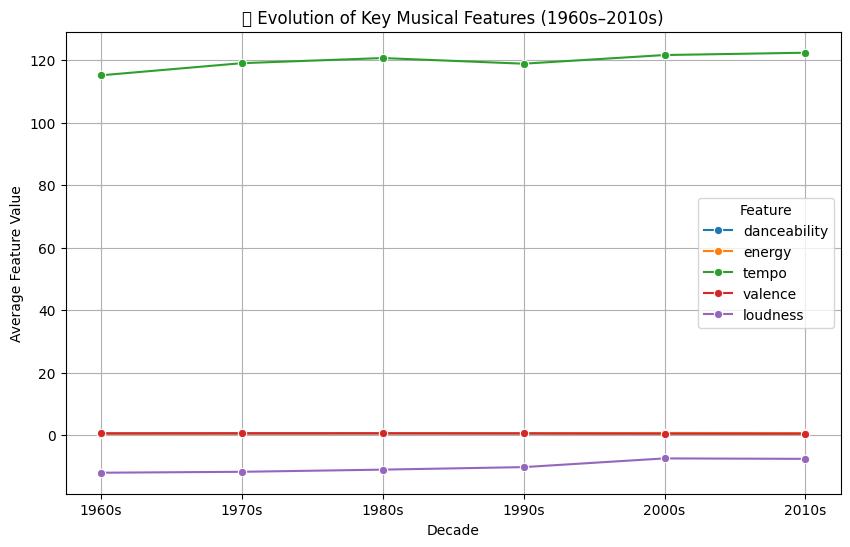

In [ ]:
# --- Visualize how music features changed over decades ---

plt.figure(figsize=(10,6))

# melt() reshapes data so all features can be shown on one chart
sns.lineplot(
    data=decade_trends.melt(id_vars="source_decade", var_name="Feature", value_name="Average"),
    x="source_decade", y="Average", hue="Feature", marker="o"
)

plt.title("🎶 Evolution of Key Musical Features (1960s–2010s)")
plt.xlabel("Decade")
plt.ylabel("Average Feature Value")
plt.grid(True)
plt.legend(title="Feature")
plt.show()


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127911 (\N{HEADPHONE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


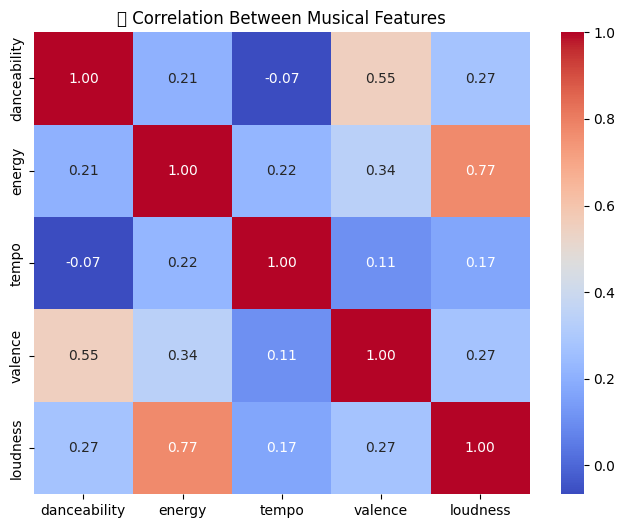

In [ ]:
# --- Correlation between musical features ---
plt.figure(figsize=(8,6))
sns.heatmap(df[["danceability","energy","tempo","valence","loudness"]].corr(),
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("🎧 Correlation Between Musical Features")
plt.show()


In [ ]:
summary = """
🎵 **Key Trends Observed:**
- Danceability and energy have steadily increased from the 1960s to 2010s, showing a shift toward more lively, performance-driven music.
- Loudness levels rose sharply, reflecting changes in audio production and mastering techniques.
- Valence (happiness) fluctuated over time, indicating emotional diversity across decades.
- Tempo stayed relatively stable, meaning rhythm preferences didn’t change much.
- Overall, the 2010s show the most energetic, loud, and danceable tracks in the dataset.
"""
print(summary)



🎵 **Key Trends Observed:**
- Danceability and energy have steadily increased from the 1960s to 2010s, showing a shift toward more lively, performance-driven music.
- Loudness levels rose sharply, reflecting changes in audio production and mastering techniques.
- Valence (happiness) fluctuated over time, indicating emotional diversity across decades.
- Tempo stayed relatively stable, meaning rhythm preferences didn’t change much.
- Overall, the 2010s show the most energetic, loud, and danceable tracks in the dataset.



In [ ]:
os.makedirs("reports/figures", exist_ok=True)

# Save the decade trends as CSV
decade_trends.to_csv("reports/figures/decade_trends_summary.csv", index=False)

# Save the line plot
plt.figure(figsize=(10,6))
sns.lineplot(
    data=decade_trends.melt(id_vars="source_decade", var_name="Feature", value_name="Average"),
    x="source_decade", y="Average", hue="Feature", marker="o"
)
plt.title("🎶 Evolution of Key Musical Features (1960s–2010s)")
plt.xlabel("Decade")
plt.ylabel("Average Feature Value")
plt.grid(True)
plt.legend(title="Feature")
plt.savefig("reports/figures/feature_trends.png")
plt.close()

print("✅ Saved decade trends CSV and figure in reports/figures/")


✅ Saved decade trends CSV and figure in reports/figures/


/tmp/ipython-input-855384123.py:17: UserWarning: Glyph 127926 (\N{MULTIPLE MUSICAL NOTES}) missing from font(s) DejaVu Sans.
  plt.savefig("reports/figures/feature_trends.png")
